# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Reading the dataset

In [2]:
df = pd.read_csv("supermarket_sales.csv")

In [3]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [4]:
df.shape

(1000, 17)

In [5]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

# Data QA

### Merging Date & Time to one column and setting this new column to datetime type

In [7]:
df["Datetime"] = pd.to_datetime(df["Date"] + " " + df["Time"])
df.drop(["Date", "Time"], axis = 1, inplace = True)

# Exploratory data analysis

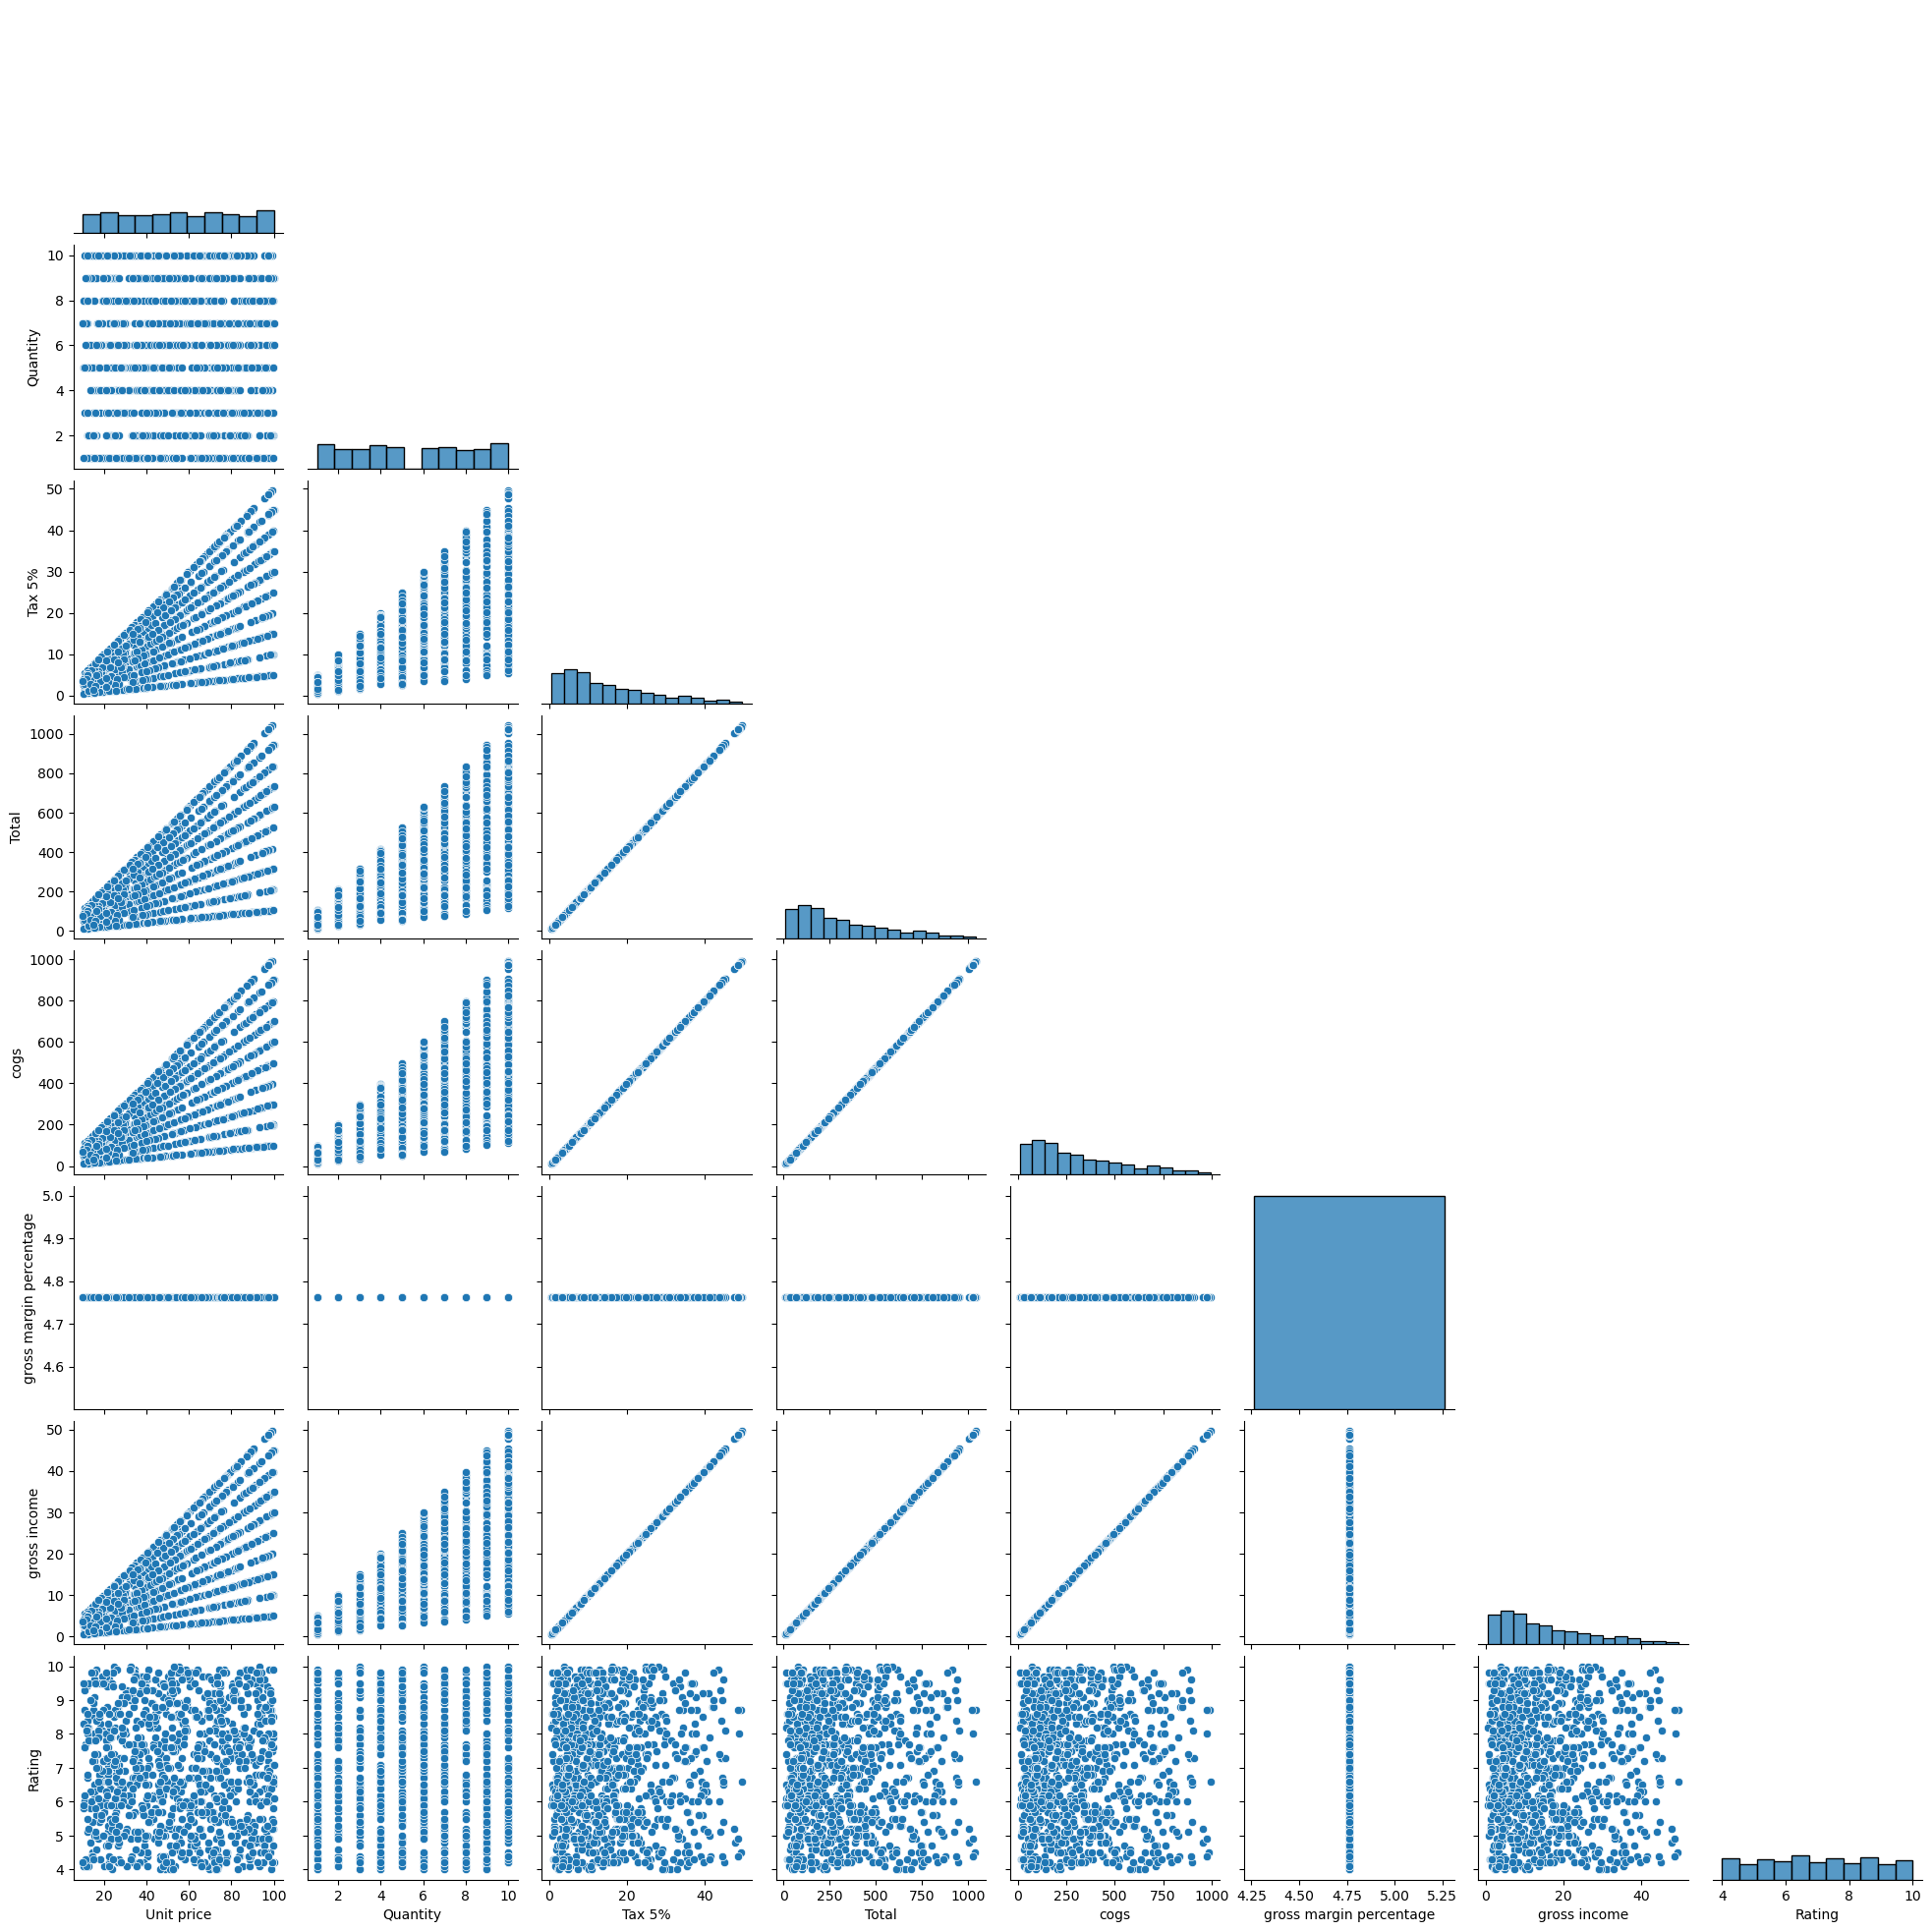

In [8]:
sns.pairplot(df, corner = True)

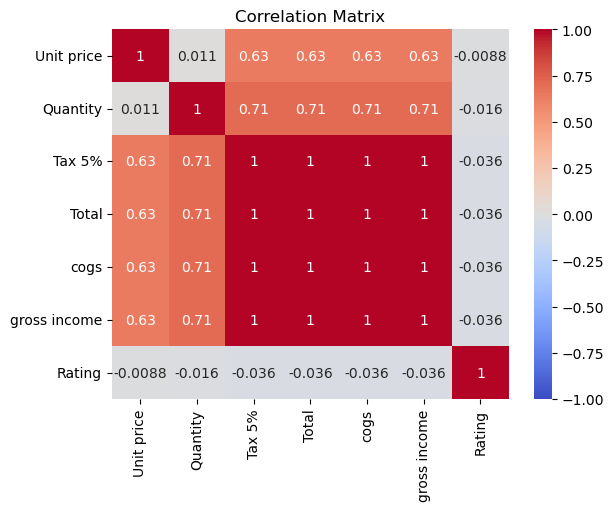

In [9]:
sns.heatmap(df.drop("gross margin percentage", axis = 1).corr(numeric_only = True), annot = True, vmin = -1, vmax = 1, cmap = "coolwarm")
plt.title('Correlation Matrix')
plt.show()

## Customer behavior analysis

### Analyzing product line popularity by customer type and gender

In [10]:
customer_type_product_popularity = df.groupby(['Customer type', 'Product line'])['Quantity'].sum().reset_index()

customer_type_product_popularity

,Customer type,Product line,Quantity
0,Member,Electronic accessories,429
1,Member,Fashion accessories,439
2,Member,Food and beverages,506
3,Member,Health and beauty,428
4,Member,Home and lifestyle,490
5,Member,Sports and travel,493
6,Normal,Electronic accessories,542
7,Normal,Fashion accessories,463
8,Normal,Food and beverages,446
9,Normal,Health and beauty,426


In [11]:
customer_type_product_popularity.pivot_table(
    index = "Product line",
    columns = "Customer type",
    values = "Quantity",
).astype(int).style.background_gradient(cmap = "RdYlGn", axis = None)

Customer type,Member,Normal
Product line,,
Electronic accessories,429,542
Fashion accessories,439,463
Food and beverages,506,446
Health and beauty,428,426
Home and lifestyle,490,421
Sports and travel,493,427


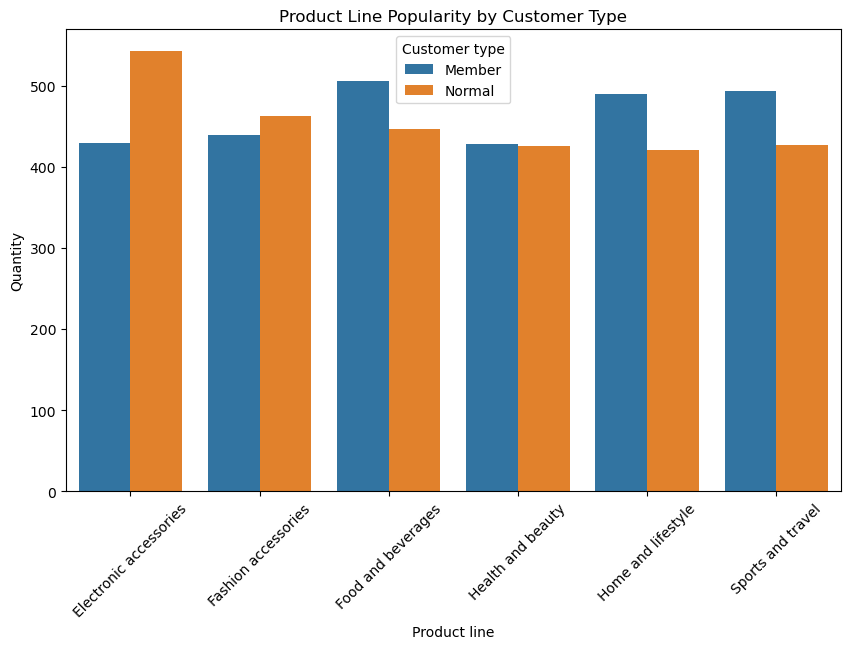

In [12]:
plt.figure(figsize=(10,6))
sns.barplot(x='Product line', y='Quantity', hue='Customer type', data=customer_type_product_popularity)
plt.title('Product Line Popularity by Customer Type')
plt.xticks(rotation=45)
plt.show()

In [13]:
gender_product_popularity = df.groupby(['Gender', 'Product line'])['Quantity'].sum().reset_index()

gender_product_popularity

,Gender,Product line,Quantity
0,Female,Electronic accessories,488
1,Female,Fashion accessories,530
2,Female,Food and beverages,514
3,Female,Health and beauty,343
4,Female,Home and lifestyle,498
5,Female,Sports and travel,496
6,Male,Electronic accessories,483
7,Male,Fashion accessories,372
8,Male,Food and beverages,438
9,Male,Health and beauty,511


In [14]:
gender_product_popularity.pivot_table(
    index = "Product line",
    columns = "Gender",
    values = "Quantity",
).astype(int).style.background_gradient(cmap = "RdYlGn", axis = None)

Gender,Female,Male
Product line,,
Electronic accessories,488,483
Fashion accessories,530,372
Food and beverages,514,438
Health and beauty,343,511
Home and lifestyle,498,413
Sports and travel,496,424


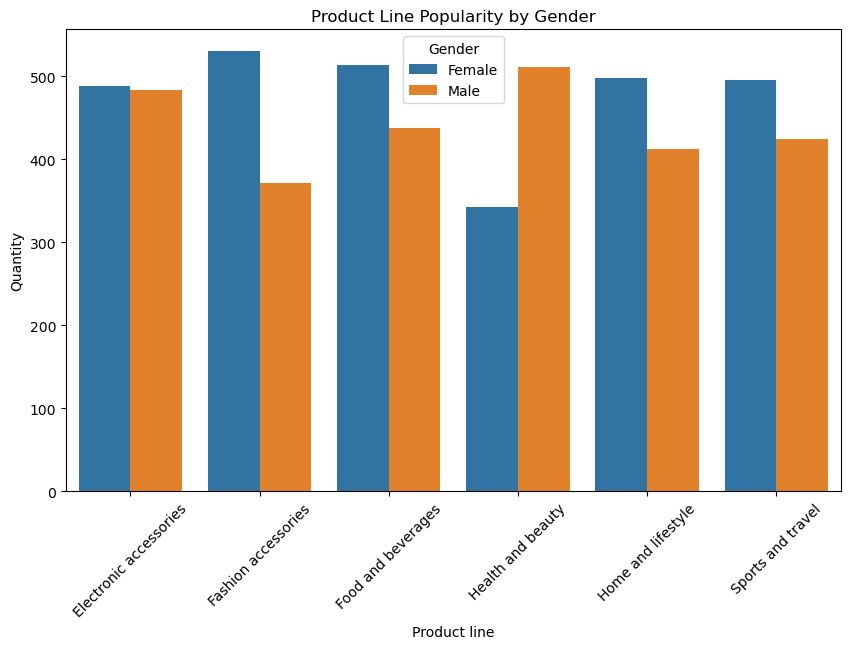

In [15]:
plt.figure(figsize=(10,6))
sns.barplot(x='Product line', y='Quantity', hue='Gender', data=gender_product_popularity)
plt.title('Product Line Popularity by Gender')
plt.xticks(rotation=45)
plt.show()

### Identifying peak shopping times by day and hour

In [16]:
df = df.assign(
    Day = df['Datetime'].dt.day_name(),
    Hour = df['Datetime'].dt.hour,
)

In [17]:
sales_by_day = df.groupby('Day')['Total'].sum().reset_index().sort_values(by='Total', ascending=False)

sales_by_day

,Day,Total
2,Saturday,56120.8095
5,Tuesday,51482.2455
4,Thursday,45349.2480
3,Sunday,44457.8925
0,Friday,43926.3405
6,Wednesday,43731.1350
1,Monday,37899.0780


C:\Users\muham\AppData\Local\Temp\ipykernel_14348\1254549049.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Day', y='Total', data=sales_by_day, palette='viridis')


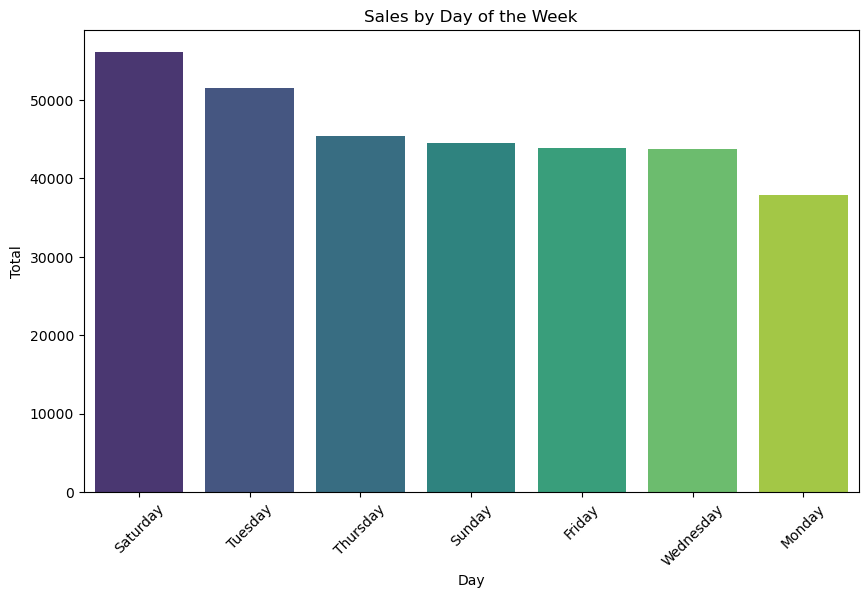

In [18]:
plt.figure(figsize=(10,6))
sns.barplot(x='Day', y='Total', data=sales_by_day, palette='viridis')
plt.title('Sales by Day of the Week')
plt.xticks(rotation=45)
plt.show()

In [19]:
sales_by_hour = df.groupby('Hour')['Total'].sum().reset_index().sort_values(by='Hour', ascending=False)

sales_by_hour

,Hour,Total
10,20,22969.5270
9,19,39699.5130
8,18,26030.3400
7,17,24445.2180
6,16,25226.3235
5,15,31179.5085
4,14,30828.3990
3,13,34723.2270
2,12,26065.8825
1,11,30377.3295


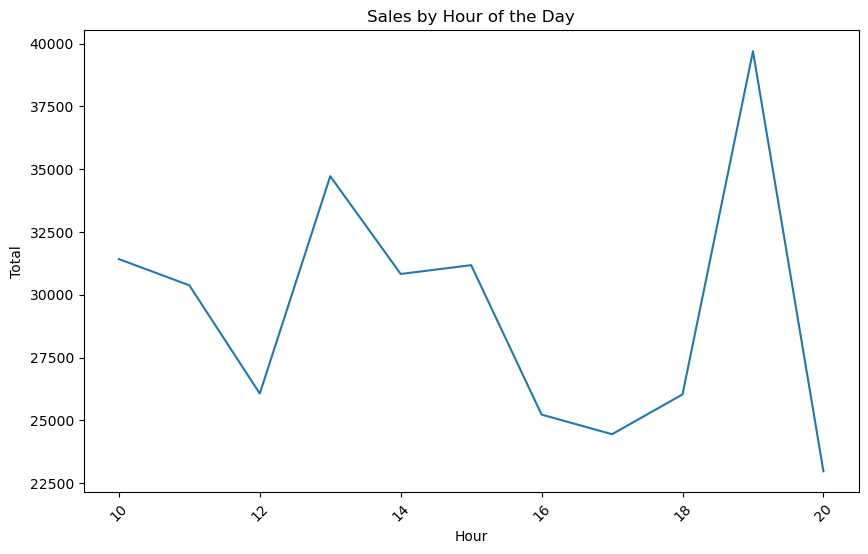

In [20]:
plt.figure(figsize=(10,6))
sns.lineplot(x='Hour', y='Total', data=sales_by_hour)
plt.title('Sales by Hour of the Day')
plt.xticks(rotation=45)
plt.show()

### Combining customer type, gender, and time for deeper insights

In [21]:
customer_behavior_analysis = (df.groupby(['Customer type', 'Gender', 'Day', 'Hour'])['Total']
                              .sum()
                              .reset_index()
                              .sort_values(by='Total', ascending=False))

customer_behavior_analysis

,Customer type,Gender,Day,Hour,Total
179,Normal,Female,Saturday,19,4171.0200
58,Member,Female,Tuesday,15,3963.4350
62,Member,Female,Tuesday,19,3295.9605
191,Normal,Female,Thursday,10,3188.0730
144,Member,Male,Wednesday,15,3076.4055
...,...,...,...,...,...
168,Normal,Female,Monday,18,49.7700
294,Normal,Male,Wednesday,16,44.5935
154,Normal,Female,Friday,15,41.3910
290,Normal,Male,Wednesday,12,32.1405


## Branch performance

### Sales preformance by branch

In [22]:
sales_per_branch = df.groupby('Branch')['Total'].sum().reset_index().sort_values(by='Total', ascending=False)

sales_per_branch

,Branch,Total
2,C,110568.7065
0,A,106200.3705
1,B,106197.6720


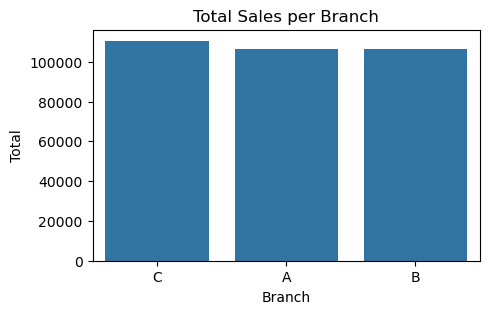

In [23]:
plt.figure(figsize=(5, 3))
sns.barplot(x='Branch', y='Total', data=sales_per_branch)
plt.title('Total Sales per Branch')
plt.show()

### Customer satisfaction (Ratings) by branch

In [24]:
ratings_per_branch = df.groupby('Branch')['Rating'].mean().reset_index().sort_values(by='Rating', ascending=False)

ratings_per_branch

,Branch,Rating
2,C,7.072866
0,A,7.027059
1,B,6.818072


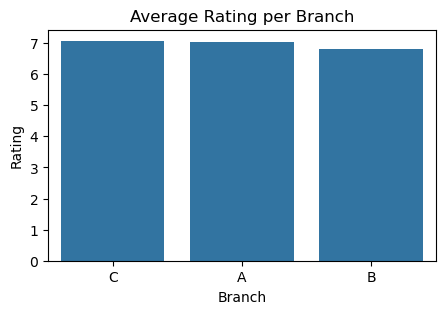

In [25]:
plt.figure(figsize=(5, 3))
sns.barplot(x='Branch', y='Rating', data=ratings_per_branch)
plt.title('Average Rating per Branch')
plt.show()

### Gross income comparison by branch

In [26]:
gross_income_per_branch = (df.groupby('Branch')['gross income']
                           .sum()
                           .reset_index()
                           .sort_values(by='gross income', ascending=False))

gross_income_per_branch

,Branch,gross income
2,C,5265.1765
0,A,5057.1605
1,B,5057.0320


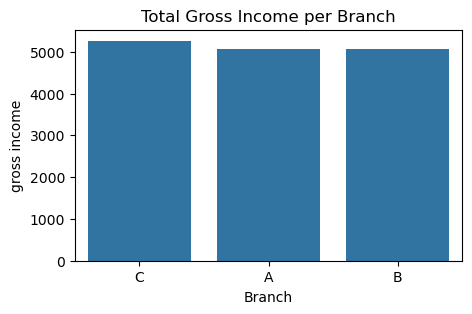

In [27]:
plt.figure(figsize=(5, 3))
sns.barplot(x='Branch', y='gross income', data=gross_income_per_branch)
plt.title('Total Gross Income per Branch')
plt.show()

### Combining sales, ratings, and gross income for a complete view

In [28]:
branch_performance = pd.merge(sales_per_branch, ratings_per_branch, on='Branch')
branch_performance = pd.merge(branch_performance, gross_income_per_branch, on='Branch')

branch_performance.columns = ['Branch', 'Total Sales', 'Average Rating', 'Total Gross Income']

branch_performance = branch_performance.sort_values(by='Total Sales', ascending=False)

branch_performance

,Branch,Total Sales,Average Rating,Total Gross Income
0,C,110568.7065,7.072866,5265.1765
1,A,106200.3705,7.027059,5057.1605
2,B,106197.6720,6.818072,5057.0320


### Performance based on product line and customer type

#### Sales by product line for each branch

In [29]:
product_sales_per_branch = (df.groupby(['Branch', 'Product line'])['Total']
                            .sum()
                            .reset_index()
                            .sort_values(by=['Branch', 'Total'], ascending=False))

product_sales_per_branch

,Branch,Product line,Total
14,C,Food and beverages,23766.8550
13,C,Fashion accessories,21560.0700
12,C,Electronic accessories,18968.9745
15,C,Health and beauty,16615.3260
17,C,Sports and travel,15761.9280
16,C,Home and lifestyle,13895.5530
11,B,Sports and travel,19988.1990
9,B,Health and beauty,19980.6600
10,B,Home and lifestyle,17549.1645
6,B,Electronic accessories,17051.4435


In [30]:
product_sales_per_branch.pivot_table(
    index="Product line",
    columns="Branch",
    values="Total"
).style.format("{:.2f}").background_gradient(cmap="RdYlGn", axis=None)

Branch,A,B,C
Product line,,,
Electronic accessories,18317.11,17051.44,18968.97
Fashion accessories,16332.51,16413.32,21560.07
Food and beverages,17163.10,15214.89,23766.85
Health and beauty,12597.75,19980.66,16615.33
Home and lifestyle,22417.20,17549.16,13895.55
Sports and travel,19372.70,19988.20,15761.93


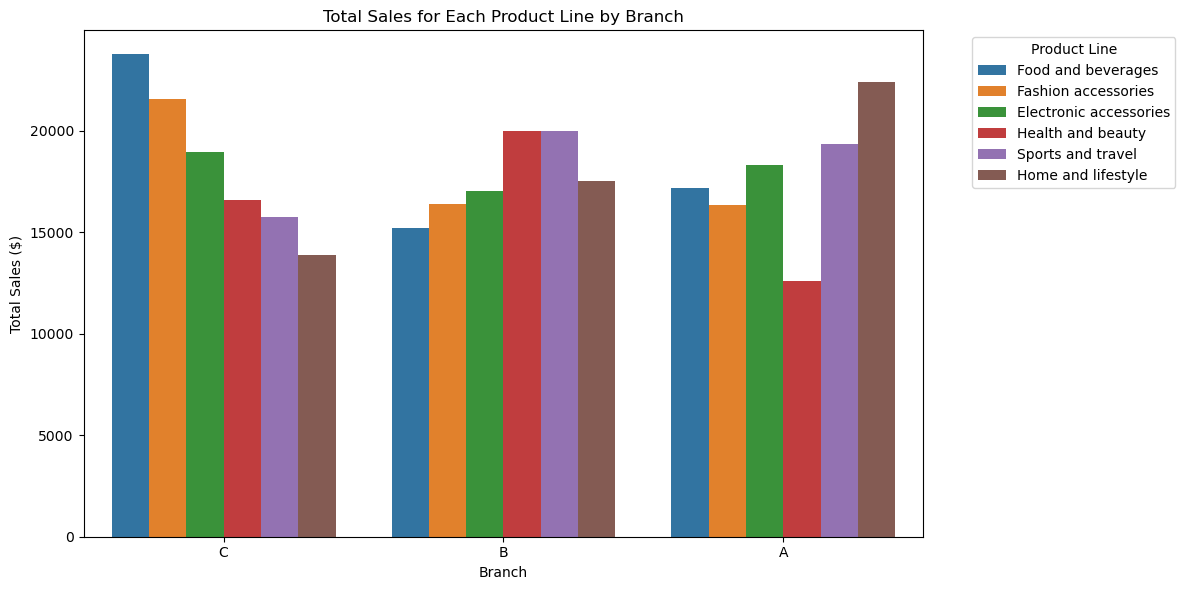

In [31]:
plt.figure(figsize=(12,6))
sns.barplot(x='Branch', y='Total', hue='Product line', data=product_sales_per_branch)
plt.title('Total Sales for Each Product Line by Branch')
plt.ylabel('Total Sales ($)')
plt.xlabel('Branch')
plt.legend(title='Product Line', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

#### Comparing performance by customer type

In [32]:
customer_type_sales_per_branch = (df.groupby(['Branch', 'Customer type'])['Total']
                                  .sum()
                                  .reset_index()
                                  .sort_values(by=['Branch', 'Total'], ascending=False))

customer_type_sales_per_branch

,Branch,Customer type,Total
4,C,Member,56881.2825
5,C,Normal,53687.4240
2,B,Member,53704.6860
3,B,Normal,52492.9860
0,A,Member,53637.4755
1,A,Normal,52562.8950


In [33]:
customer_type_sales_per_branch.pivot_table(
    index = "Customer type",
    columns = "Branch",
    values = "Total",
).style.format("{:.2f}").background_gradient(cmap = "RdYlGn", axis = None)

Branch,A,B,C
Customer type,,,
Member,53637.48,53704.69,56881.28
Normal,52562.89,52492.99,53687.42


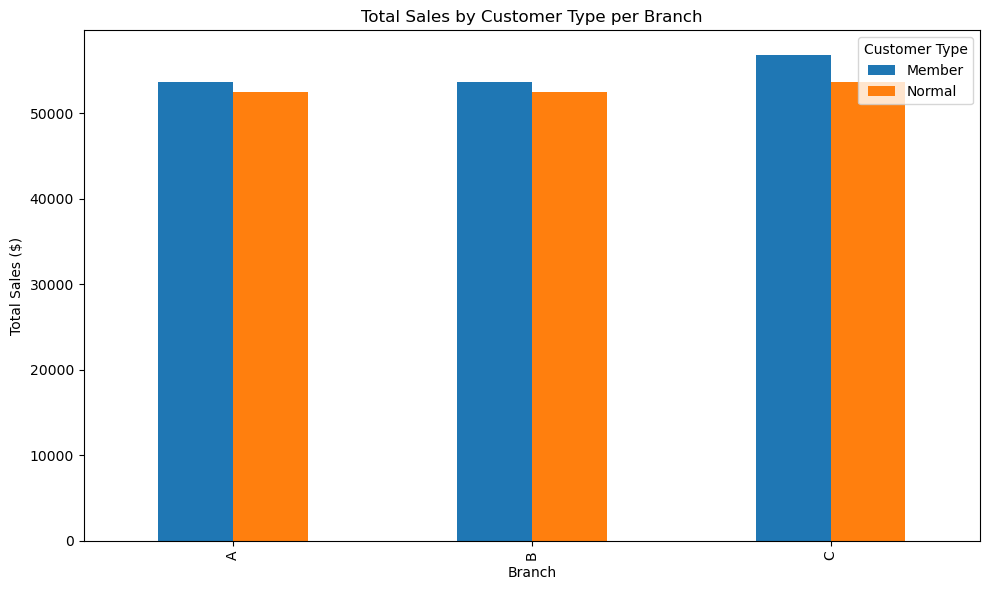

In [34]:
customer_type_pivot = customer_type_sales_per_branch.pivot(
    index='Branch', 
    columns='Customer type', 
    values='Total')

customer_type_pivot.plot(kind='bar', figsize=(10,6))

plt.title('Total Sales by Customer Type per Branch')
plt.ylabel('Total Sales ($)')
plt.xlabel('Branch')
plt.legend(title='Customer Type')
plt.tight_layout()
plt.show()

## Customer satisfaction

### Categorizing customer ratings

In [35]:
df = df.assign(
    Satisfaction_Level = np.where(df["Rating"] <= 4, "Low", 
                                  np.where((df["Rating"] >= 5) & (df["Rating"] <= 7), "Medium", "High"))
).rename(columns = {"Satisfaction_Level": "Satisfaction Level"})

df[['Rating', 'Satisfaction Level']]

,Rating,Satisfaction Level
0,9.1,High
1,9.6,High
2,7.4,High
3,8.4,High
4,5.3,Medium
...,...,...
995,6.2,Medium
996,4.4,High
997,7.7,High
998,4.1,High


### Exploring relationships between features and ratings

#### Product line vs. Satisfaction level

In [36]:
product_line_satisfaction = df.groupby(['Product line', 'Satisfaction Level'])['Invoice ID'].count().reset_index()

product_line_satisfaction.rename(columns={'Invoice ID': 'Count'}, inplace=True)

product_line_satisfaction = product_line_satisfaction.sort_values(by='Count', ascending=False)

product_line_satisfaction

,Product line,Satisfaction Level,Count
6,Food and beverages,High,113
3,Fashion accessories,High,111
12,Home and lifestyle,High,106
0,Electronic accessories,High,103
9,Health and beauty,High,100
14,Sports and travel,High,90
16,Sports and travel,Medium,75
2,Electronic accessories,Medium,66
5,Fashion accessories,Medium,65
8,Food and beverages,Medium,57


In [37]:
product_line_satisfaction.pivot_table(
    index = "Product line",
    columns = "Satisfaction Level",
    values = "Count",
).replace(np.NAN, 0).style.format("{:.0f}").background_gradient(cmap="RdYlGn", axis=None)

Satisfaction Level,High,Low,Medium
Product line,,,
Electronic accessories,103,1,66
Fashion accessories,111,2,65
Food and beverages,113,4,57
Health and beauty,100,3,49
Home and lifestyle,106,0,54
Sports and travel,90,1,75


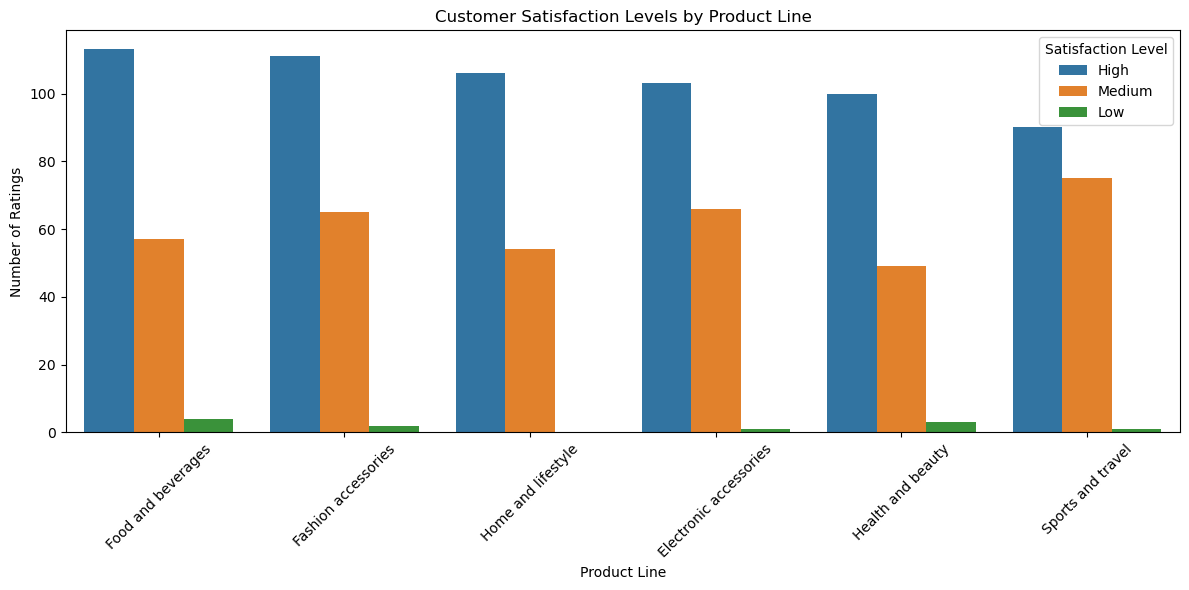

In [38]:
plt.figure(figsize=(12,6))
sns.barplot(x='Product line', y='Count', hue='Satisfaction Level', data=product_line_satisfaction)
plt.title('Customer Satisfaction Levels by Product Line')
plt.ylabel('Number of Ratings')
plt.xlabel('Product Line')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Payment method vs. Satisfaction level

In [39]:
payment_satisfaction = df.groupby(['Payment', 'Satisfaction Level'])['Invoice ID'].count().reset_index()

payment_satisfaction.rename(columns={'Invoice ID': 'Count'}, inplace=True)
payment_satisfaction = payment_satisfaction.sort_values(by='Count', ascending=False)

payment_satisfaction

,Payment,Satisfaction Level,Count
6,Ewallet,High,212
0,Cash,High,209
3,Credit card,High,202
2,Cash,Medium,133
8,Ewallet,Medium,129
5,Credit card,Medium,104
4,Credit card,Low,5
7,Ewallet,Low,4
1,Cash,Low,2


In [40]:
payment_satisfaction.pivot_table(
    index = "Payment",
    columns = "Satisfaction Level",
    values = "Count",
).style.format("{:.0f}").background_gradient(cmap="RdYlGn", axis=None)

Satisfaction Level,High,Low,Medium
Payment,,,
Cash,209,2,133
Credit card,202,5,104
Ewallet,212,4,129


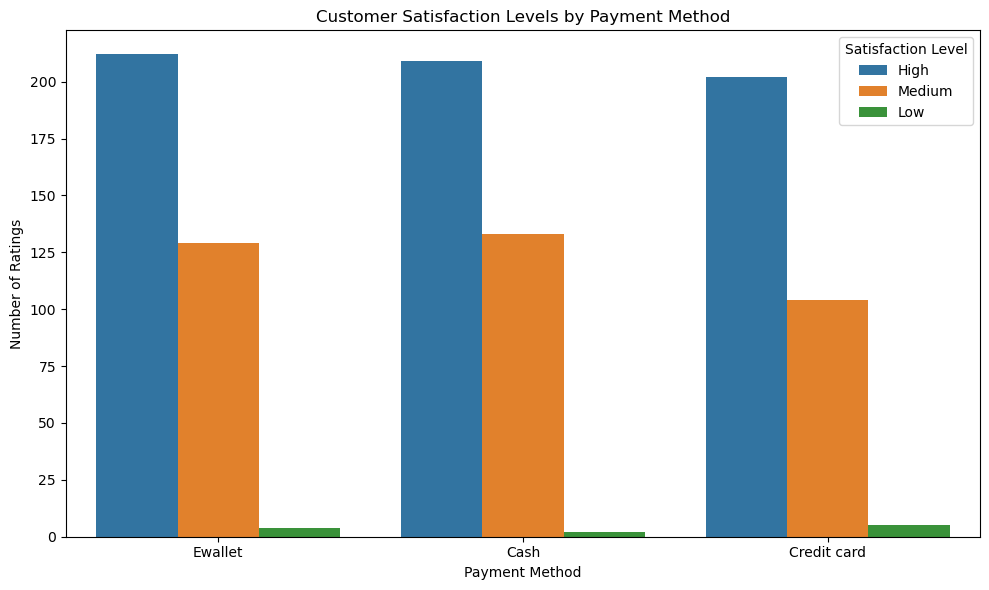

In [41]:
plt.figure(figsize=(10,6))
sns.barplot(x='Payment', y='Count', hue='Satisfaction Level', data=payment_satisfaction)
plt.title('Customer Satisfaction Levels by Payment Method')
plt.ylabel('Number of Ratings')
plt.xlabel('Payment Method')
plt.tight_layout()
plt.show()

## Product insights

### Sales volume analysis by product line

In [42]:
product_sales_volume = df.groupby('Product line')['Quantity'].sum().sort_values(ascending=False).reset_index()

product_sales_volume

,Product line,Quantity
0,Electronic accessories,971
1,Food and beverages,952
2,Sports and travel,920
3,Home and lifestyle,911
4,Fashion accessories,902
5,Health and beauty,854


C:\Users\muham\AppData\Local\Temp\ipykernel_14348\3834683622.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = product_sales_volume, x="Product line", y="Quantity", palette='viridis')


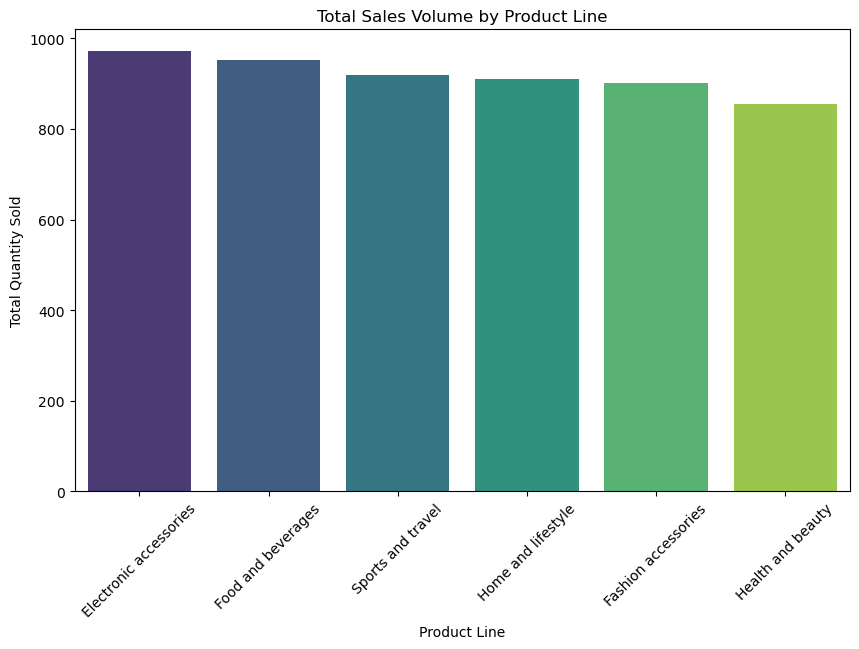

In [43]:
plt.figure(figsize=(10,6))
sns.barplot(data = product_sales_volume, x="Product line", y="Quantity", palette='viridis')
plt.title('Total Sales Volume by Product Line')
plt.xlabel('Product Line')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45)
plt.show()

### Gross income contribution by product line

In [44]:
product_gross_income = df.groupby('Product line')['gross income'].sum().sort_values(ascending=False).reset_index()

product_gross_income

,Product line,gross income
0,Food and beverages,2673.5640
1,Sports and travel,2624.8965
2,Electronic accessories,2587.5015
3,Fashion accessories,2585.9950
4,Home and lifestyle,2564.8530
5,Health and beauty,2342.5590


C:\Users\muham\AppData\Local\Temp\ipykernel_14348\2213055040.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = product_gross_income, x="Product line", y="gross income", palette='viridis')


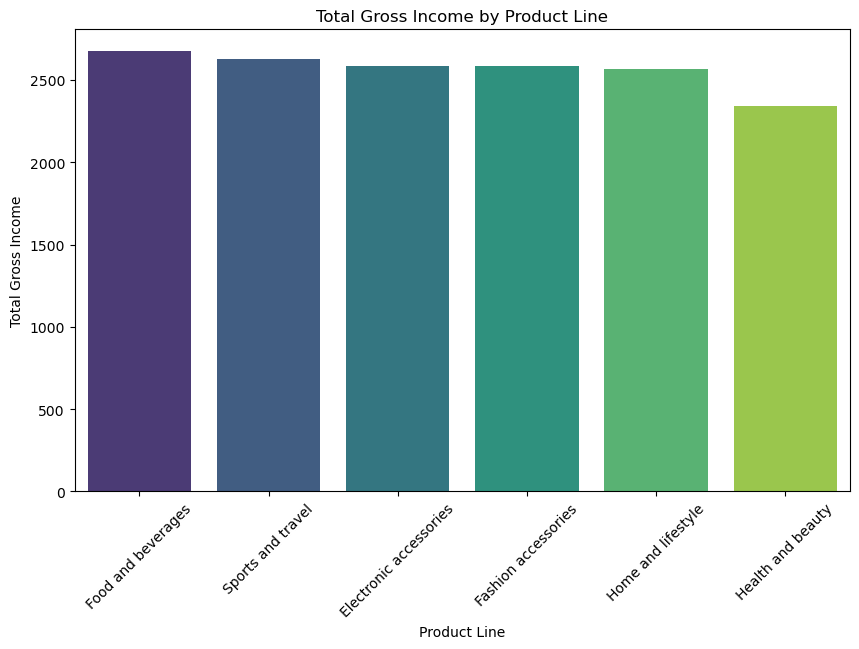

In [45]:
plt.figure(figsize=(10,6))
sns.barplot(data = product_gross_income, x="Product line", y="gross income", palette='viridis')
plt.title('Total Gross Income by Product Line')
plt.xlabel('Product Line')
plt.ylabel('Total Gross Income')
plt.xticks(rotation=45)
plt.show()

### Average gross income per sale by product line

In [46]:
avg_gross_income_per_sale = df.groupby('Product line')['gross income'].mean().sort_values(ascending=False).reset_index()

avg_gross_income_per_sale

,Product line,gross income
0,Home and lifestyle,16.030331
1,Sports and travel,15.812630
2,Health and beauty,15.411572
3,Food and beverages,15.365310
4,Electronic accessories,15.220597
5,Fashion accessories,14.528062


C:\Users\muham\AppData\Local\Temp\ipykernel_14348\633252291.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = avg_gross_income_per_sale, x="Product line", y="gross income", palette='viridis')


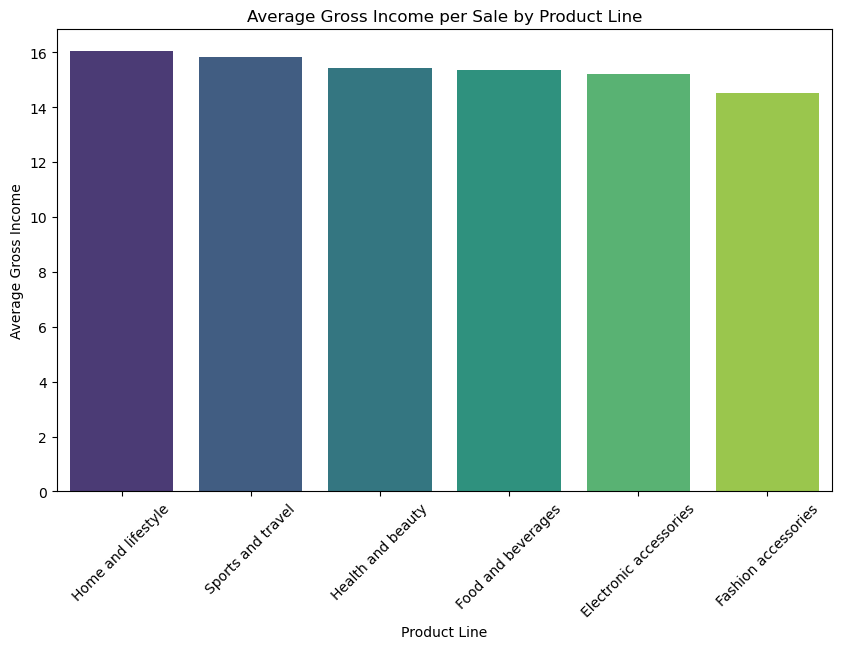

In [47]:
plt.figure(figsize=(10,6))
sns.barplot(data = avg_gross_income_per_sale, x="Product line", y="gross income", palette='viridis')
plt.title('Average Gross Income per Sale by Product Line')
plt.xlabel('Product Line')
plt.ylabel('Average Gross Income')
plt.xticks(rotation=45)
plt.show()

### Correlation between sales volume and gross income

In [48]:
product_analysis = df.groupby('Product line').agg({'Quantity': 'sum', 'gross income': 'sum'}).reset_index()

product_analysis

,Product line,Quantity,gross income
0,Electronic accessories,971,2587.5015
1,Fashion accessories,902,2585.9950
2,Food and beverages,952,2673.5640
3,Health and beauty,854,2342.5590
4,Home and lifestyle,911,2564.8530
5,Sports and travel,920,2624.8965


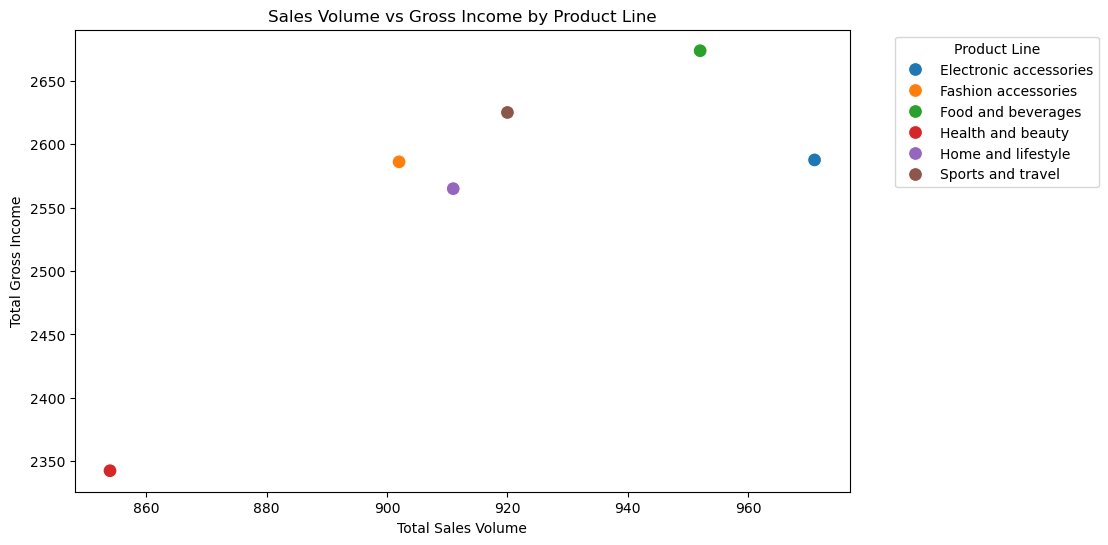

In [49]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=product_analysis, x='Quantity', y='gross income', hue="Product line", s = 100)
plt.title('Sales Volume vs Gross Income by Product Line')
plt.xlabel('Total Sales Volume')
plt.ylabel('Total Gross Income')
plt.legend(title='Product Line', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Product line comparison by customer type

In [50]:
product_customer_analysis = df.groupby(['Product line', 'Customer type']).agg({'Quantity': 'sum', 'gross income': 'sum'}).unstack()

product_customer_analysis

Quantity        gross income           
Customer type            Member Normal       Member     Normal
Product line                                                  
Electronic accessories      429    542    1166.5950  1420.9065
Fashion accessories         439    463    1253.5220  1332.4730
Food and beverages          506    446    1493.2200  1180.3440
Health and beauty           428    426    1230.0495  1112.5095
Home and lifestyle          490    421    1332.2870  1232.5660
Sports and travel           493    427    1344.4905  1280.4060

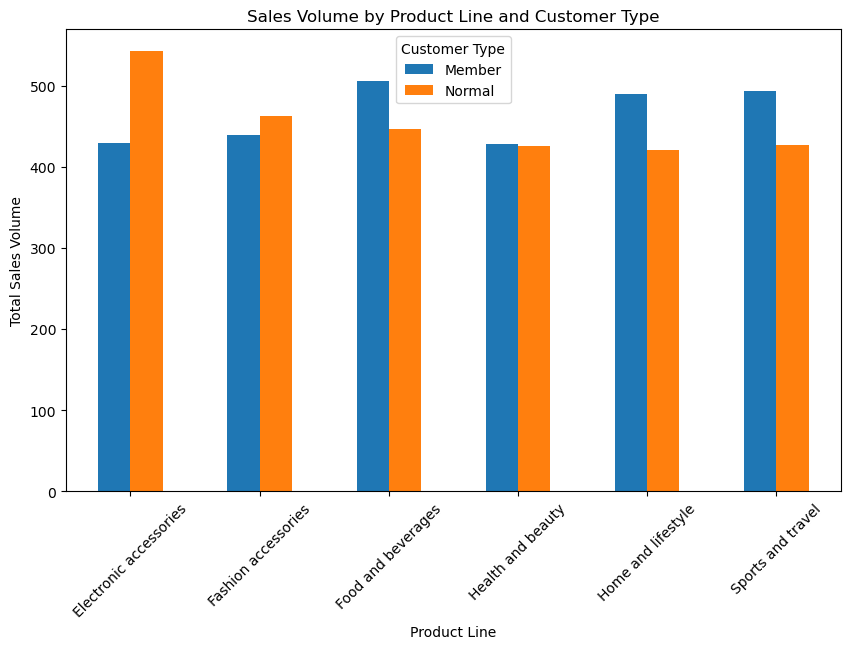

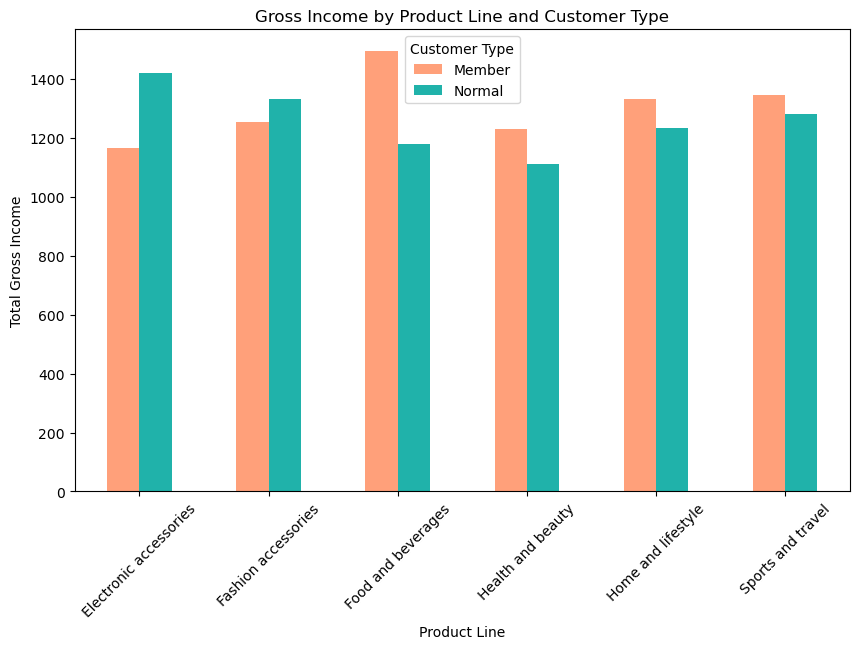

In [51]:
product_customer_analysis['Quantity'].plot(kind='bar', figsize=(10,6))
plt.title('Sales Volume by Product Line and Customer Type')
plt.xlabel('Product Line')
plt.ylabel('Total Sales Volume')
plt.xticks(rotation=45)
plt.legend(title='Customer Type')
plt.show()

product_customer_analysis['gross income'].plot(kind='bar', figsize=(10,6), color=['#FFA07A', '#20B2AA'])
plt.title('Gross Income by Product Line and Customer Type')
plt.xlabel('Product Line')
plt.ylabel('Total Gross Income')
plt.xticks(rotation=45)
plt.legend(title='Customer Type')
plt.show()